In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bicker.emulator as BICKER

In [2]:
path_to_repo = "/Users/jamie/Desktop/GitHubProjects/BICKER/"

In [3]:
test_id = np.load(path_to_repo+"bicker-cache/split/test.npy")

In [4]:
cosmos = np.load(path_to_repo+"data/cosmologies/eft_cosmologies_noDQ1.npy")[test_id]

In [5]:
files = BICKER.group_info(0, file_list=True)

In [6]:
kernels = []
for file in files:
        kernels.append(np.load(path_to_repo+"data/kernels/"+file)[test_id,5:47])

In [7]:
emu = BICKER.component_emulator(0)

2022-02-18 17:56:56.690404: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
test_preds = emu.emu_predict(cosmos, split=True)

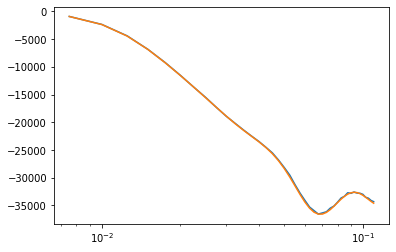

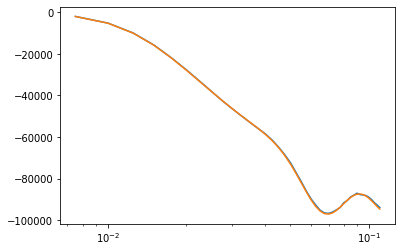

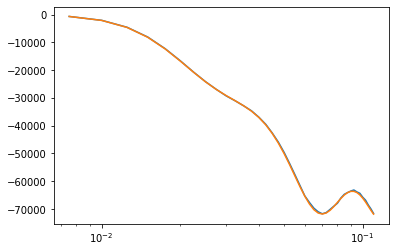

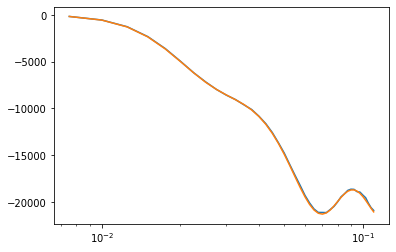

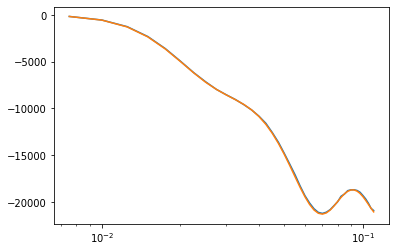

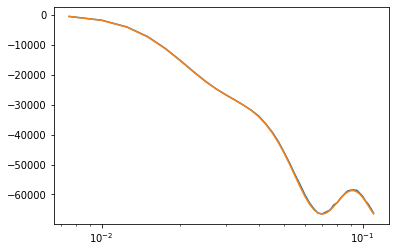

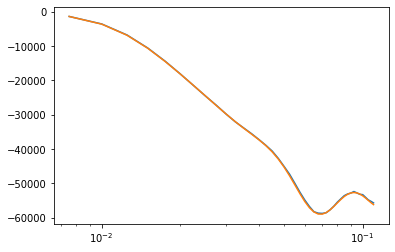

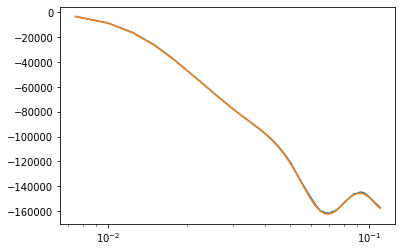

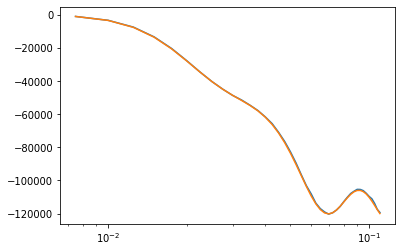

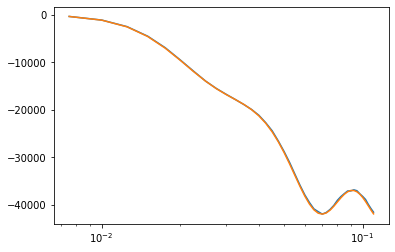

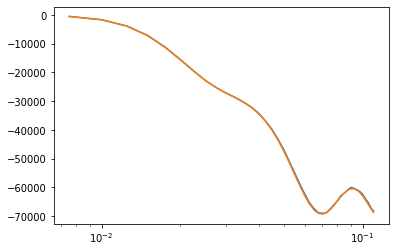

In [9]:
for i in range(emu.nKer):
    plt.semilogx(emu.kbins, emu.kbins*test_preds[i][0])
    plt.semilogx(emu.kbins, emu.kbins*kernels[i][0])
    plt.show()

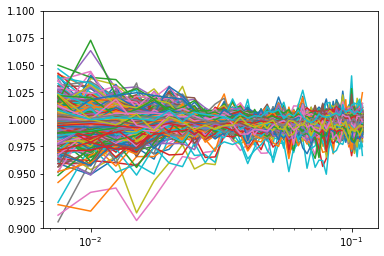

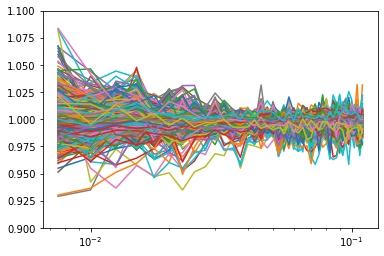

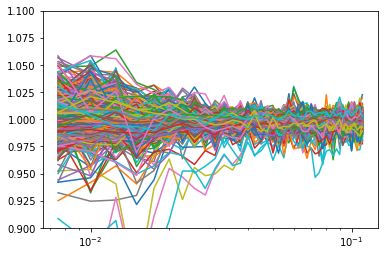

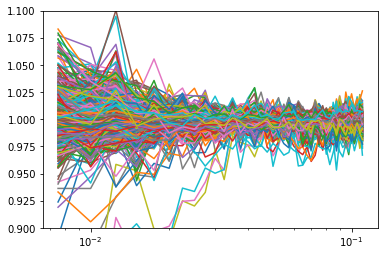

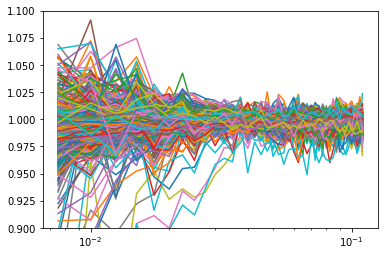

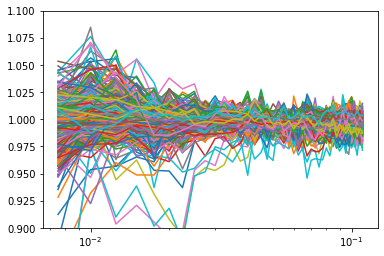

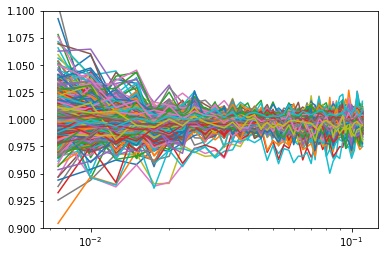

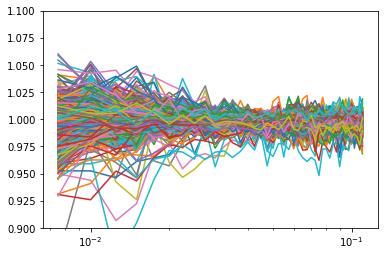

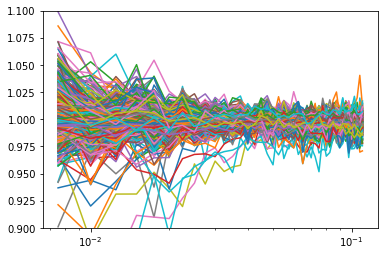

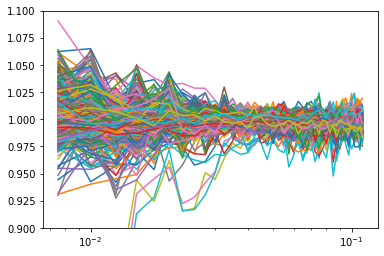

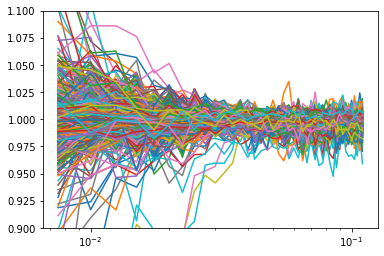

In [11]:
for i in range(emu.nKer):
    plt.semilogx(emu.kbins, (test_preds[i]/kernels[i]).T)
    plt.ylim(0.9, 1.1)
    plt.show()